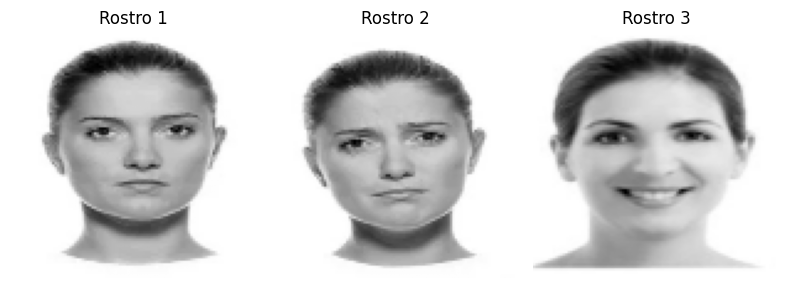

Distancia Euclidiana entre rostro 1 y rostro 2: 15.155365575549999
Distancia Euclidiana entre rostro 1 y rostro 3: 16.54601961470945
Distancia Euclidiana entre rostro 2 y rostro 3: 19.365998733834047


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

# Rutas de las imágenes (cámbialas por tus archivos locales)
img_paths = ["/content/drive/MyDrive/Fotos/foto1.png", "/content/drive/MyDrive/Fotos/foto2.png", "/content/drive/MyDrive/Fotos/foto3.png"]

# Lista para almacenar los vectores de las imágenes
vectors = []
images_resized = []

# Preprocesamiento: lectura, escala de grises, resize y vectorización
for path in img_paths:
    # Leer imagen
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  # Lee directamente en escala de grises

    # Redimensionar a un tamaño estándar (ej. 100x100)
    img_resized = cv2.resize(img, (100, 100))

    # Normalizar a rango [0,1]
    img_normalized = img_resized / 255.0

    # Vectorizar o convertir
    vector = img_normalized.flatten()

    vectors.append(vector)
    images_resized.append(img_normalized)

# Convertimos la lista en un arreglo numpy
vectors = np.array(vectors)

# Mostrar imágenes en escala de grises y sus vectores
fig, axs = plt.subplots(1, 3, figsize=(8, 10))

for i in range(3):
    # Imagen en grises
    axs[i].imshow(images_resized[i], cmap="gray")
    axs[i].set_title(f"Rostro {i+1}")
    axs[i].axis("off")

plt.tight_layout()
plt.show()

# Calcular distancias euclidianas entre las imágenes
d12 = distance.euclidean(vectors[0], vectors[1])
d13 = distance.euclidean(vectors[0], vectors[2])
d23 = distance.euclidean(vectors[1], vectors[2])

print("Distancia Euclidiana entre rostro 1 y rostro 2:", d12)
print("Distancia Euclidiana entre rostro 1 y rostro 3:", d13)
print("Distancia Euclidiana entre rostro 2 y rostro 3:", d23)

alpha analítico: 0.9921796457300655
Convergencia en iteración 40
alpha gradiente: 0.9920477624338702
diferencia alpha (analítico - gd): 0.00013188329619528982


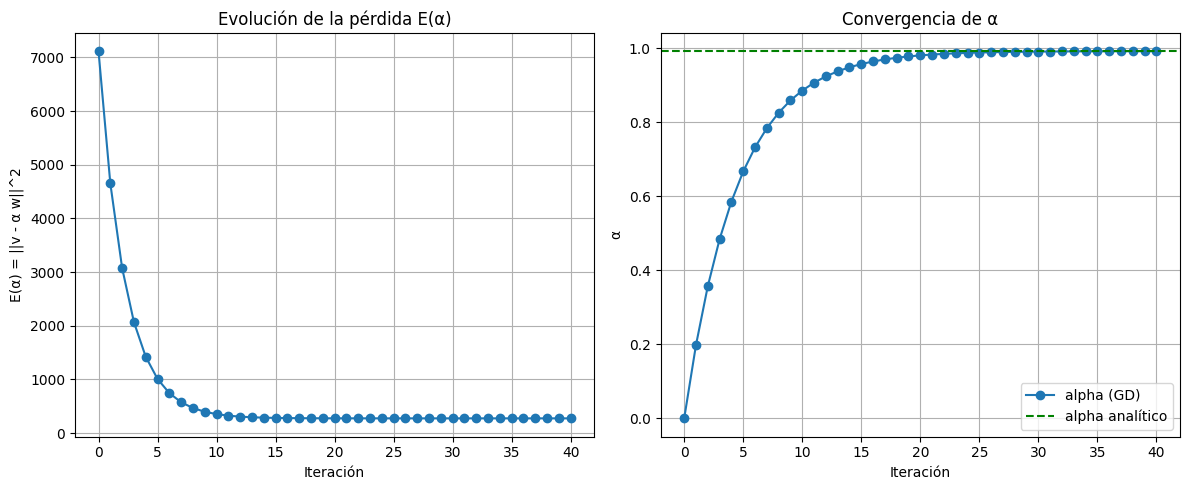

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# vectores (ya los tienes)
v = vectors[0]
w = vectors[2]

# comprobación básica
w_dot_w = np.dot(w, w)
v_dot_w = np.dot(v, w)
if w_dot_w == 0:
    raise ValueError("w tiene norma cero, no se puede proyectar.")

# --- solución analítica ---
alpha_analytical = v_dot_w / w_dot_w
print("alpha analítico:", alpha_analytical)

# --- gradiente descendente (implementación robusta) ---
alpha = 0.0                     # inicialización
max_iters = 200                 # número de iteraciones
# regla segura: eta < 1 / (w_dot_w)
eta = 0.1 / w_dot_w             # elección práctica de eta
tol = 1e-4                      # elección practica de tolerancia
alpha_history = [alpha]         # guardamos el alpha inicial
loss_history = [np.dot(v - alpha*w, v - alpha*w)]  # loss inicial

for it in range(1, max_iters+1):
    # gradiente evaluado en alpha_k
    grad = -2 * v_dot_w + 2*alpha*w_dot_w

    # paso de gradiente
    alpha = alpha - eta * grad

    # guardar historial (después de la actualización)
    alpha_history.append(alpha)
    loss_history.append(np.dot(v - alpha*w, v - alpha*w))

    # criterio de parada (opcional)
    if abs(loss_history[-1] - loss_history[-2]) < tol:
        print(f"Convergencia en iteración {it}")
        break

alpha_gd = alpha
print("alpha gradiente:", alpha_gd)
print("diferencia alpha (analítico - gd):", alpha_analytical - alpha_gd)

# --- visualizaciones ---
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(loss_history, marker='o')
plt.title("Evolución de la pérdida E(α)")
plt.xlabel("Iteración")
plt.ylabel("E(α) = ||v - α w||^2")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(alpha_history, marker='o', label='alpha (GD)')
plt.axhline(alpha_analytical, color='green', linestyle='--', label='alpha analítico')
plt.title("Convergencia de α")
plt.xlabel("Iteración")
plt.ylabel("α")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
